In [2]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
file_path = 'bank-full.csv'
data = pd.read_csv(file_path, delimiter=';')
print("Dataset loaded successfully.")
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset loaded successfully.

First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [15]:
# Step 2: Inspect the dataset
print("\nInspecting the dataset...")
print(data.info())
print("\nChecking for missing values...")
print(data.isnull().sum())


Inspecting the dataset...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Checking for missing values...
age          0
job          0
marit

In [16]:
# Step 3: Encode categorical variables
print("\nEncoding categorical variables...")
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
print("Encoding completed.")
print("\nFirst 5 rows after encoding:")
print(data.head())


Encoding categorical variables...
Encoding completed.

First 5 rows after encoding:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


In [17]:
# Step 4: Separate features and target variable
print("\nSeparating features and target variable...")
time.sleep(1)
X = data.drop(columns=["y"])  # Features
y = data["y"]  # Target
print("Features and target variable separated.")


Separating features and target variable...
Features and target variable separated.


In [18]:
# Step 5: Split the dataset into training and testing sets
print("\nSplitting dataset into training and testing sets...")
time.sleep(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data split completed.")
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")


Splitting dataset into training and testing sets...
Data split completed.
Training set size: 31647, Testing set size: 13564


In [19]:
# Step 6: Standardize the features
print("\nStandardizing the features...")
time.sleep(1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Standardization completed.")


Standardizing the features...
Standardization completed.


In [20]:
# Step 7: Train the SVM model
print("\nTraining the SVM model...")
time.sleep(1)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
print("Model training completed.")


Training the SVM model...
Model training completed.


In [21]:
# Step 8: Make predictions
print("\nMaking predictions on the test set...")
time.sleep(1)
y_pred = svm_model.predict(X_test)
print("Predictions completed.")


Making predictions on the test set...
Predictions completed.


In [22]:
# Step 9: Evaluate the model
print("\nEvaluating the model...")
time.sleep(1)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(confusion_mat)
print(f"\nAccuracy Score: {accuracy:.2f}")


Evaluating the model...

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.65      0.27      0.38      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.63      0.66     13564
weighted avg       0.88      0.90      0.88     13564


Confusion Matrix:
[[11736   230]
 [ 1166   432]]

Accuracy Score: 0.90



Visualizing the confusion matrix...


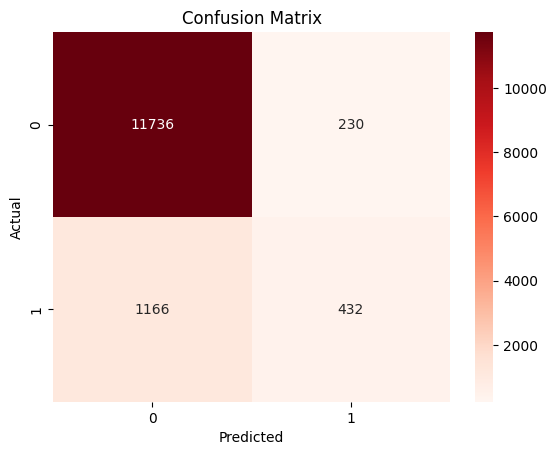


Task completed.


In [12]:
# Step 10: Visualize the confusion matrix
print("\nVisualizing the confusion matrix...")
time.sleep(1)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nTask completed.")